In [1]:
from appgeopy import *
from my_packages import *

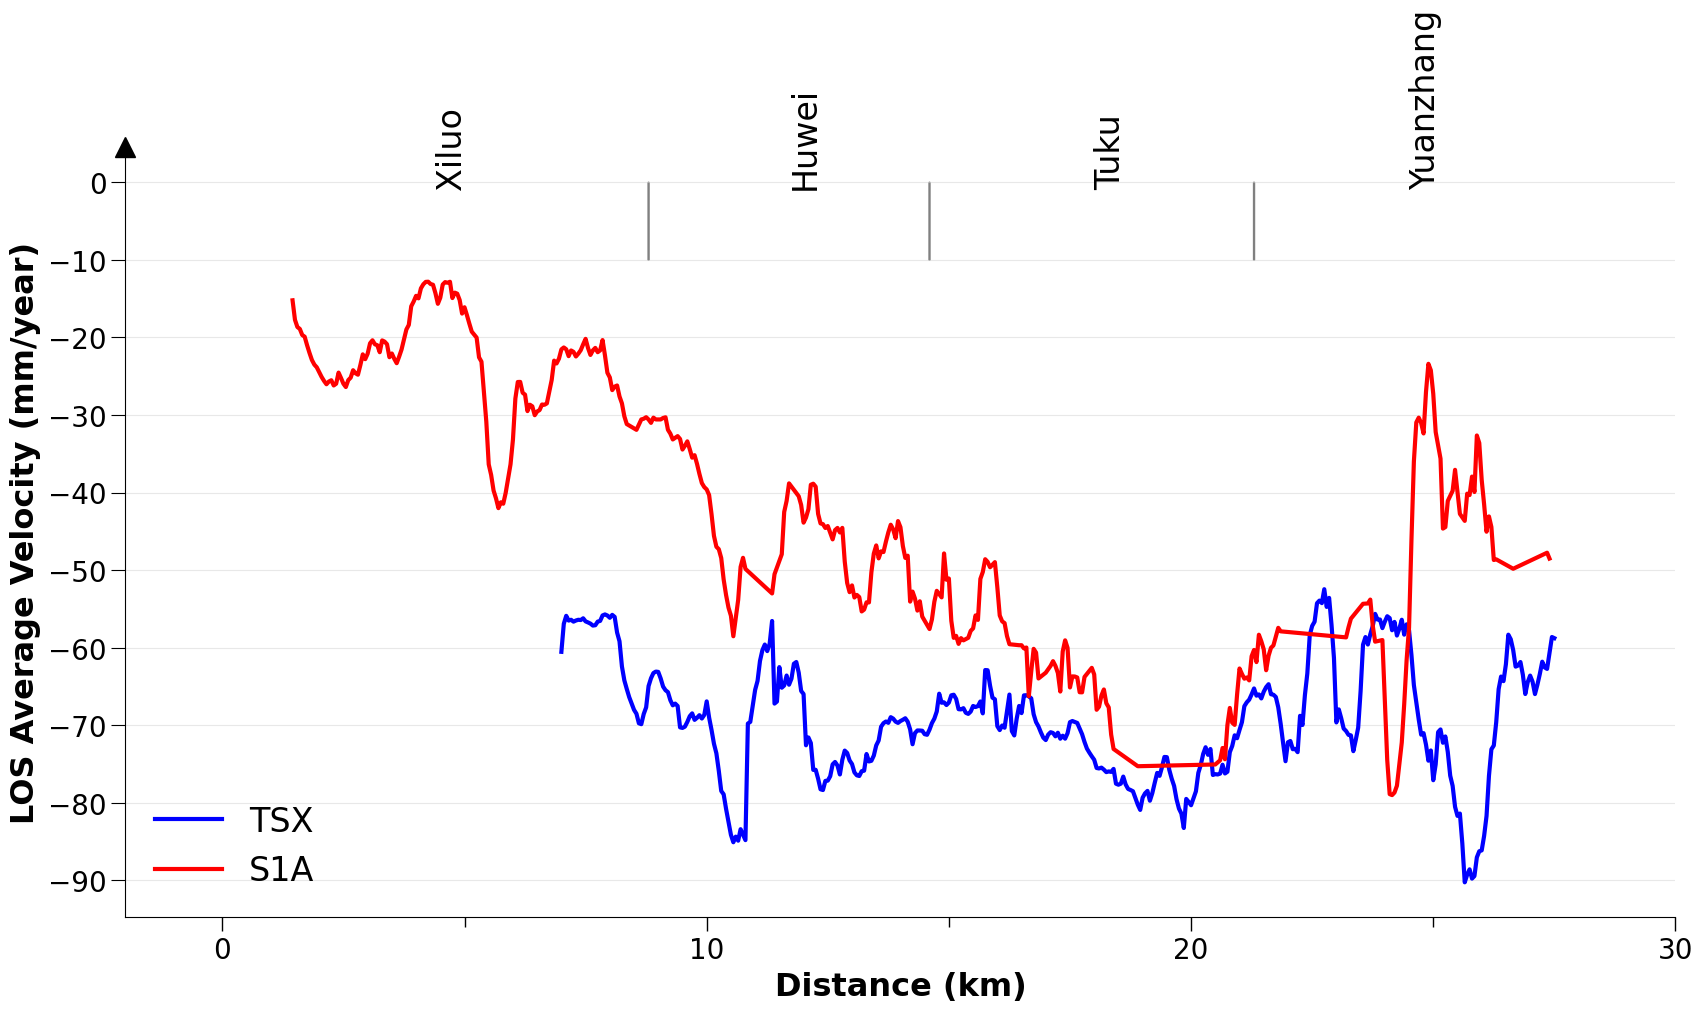

In [20]:
# Step 1: Set up paths and folders
folder2savefigure = (
    r"D:\003_PRESENTATIONS\20_TSX_Sentinel_Report\images_figures"
)

# Ensure the folder to save figures exists
if not os.path.exists(folder2savefigure):
    os.makedirs(folder2savefigure)

# Step 2: Load data from Excel files
# TSX
tsx_mean_velocity_fpath = r"D:\003_PRESENTATIONS\20_TSX_Sentinel_Report\hsr_section\TSX_files\Mean_TSX_HSR_Buffer_200m_TWD97.xlsx"
tsx_stdev_velocity_filepath = r"D:\003_PRESENTATIONS\20_TSX_Sentinel_Report\hsr_section\TSX_files\Stdev_TSX_HSR_Buffer_200m_TWD97.xlsx"
tsx_mean_velocity_data = pd.read_excel(tsx_mean_velocity_fpath)
tsx_stdev_velocity_data = pd.read_excel(tsx_stdev_velocity_filepath)

# SENTINEL-1A
s1a_mean_velocity_fpath = r"D:\003_PRESENTATIONS\20_TSX_Sentinel_Report\hsr_section\S1A_files\Mean_S1A_HSR_Buffer_200m_TWD97.xlsx"
s1a_stdev_velocity_filepath = r"D:\003_PRESENTATIONS\20_TSX_Sentinel_Report\hsr_section\S1A_files\Stdev_S1A_HSR_Buffer_200m_TWD97.xlsx"
s1a_mean_velocity_data = pd.read_excel(s1a_mean_velocity_fpath)
s1a_stdev_velocity_data = pd.read_excel(s1a_stdev_velocity_filepath)


# Step 3: Load regional data
region_df = pd.read_excel(
    r"E:\010__SS3_TRY_MY_BEST_TO_SURVIVE_POSTPROCESSING\HSR_PROFILE_Manuscript\AlongTrackProfile\station_region_092022.xlsx"
)
region_df = region_df.iloc[4:, :]
region_df["END_KM"] = region_df["END_KM"] - region_df.iloc[0, 1]
end_km = region_df["END_KM"].values
district_name = region_df["DISTRICT"].values

# Step 4: Prepare data for plotting
# Extract the X values and adjust them based on the region
tsx_x_values_from_segment = [
    np.float64(segment.split("_")[-1]) / 1000
    for segment in tsx_mean_velocity_data["Segment"]
]
tsx_x_values_from_segment = [x - 21.5 for x in tsx_x_values_from_segment]

s1a_x_values_from_segment = [
    np.float64(segment.split("_")[-1]) / 1000
    for segment in s1a_mean_velocity_data["Segment"]
]
s1a_x_values_from_segment = [x - 21.5 for x in s1a_x_values_from_segment]

# Get the average velocity data
tsx_average_velocity_arr = tsx_mean_velocity_data["velocity_mm_per_year"]
s1a_average_velocity_arr = s1a_mean_velocity_data["velocity_mm_per_year"]

# Apply a moving average to smooth the data
MA_tsx_average_velocity_arr = smoothing.simple_moving_average(
    tsx_average_velocity_arr, window_size=11
)

MA_s1a_average_velocity_arr = smoothing.simple_moving_average(
    s1a_average_velocity_arr, window_size=11
)


# Step 5: Create the plot
cm = 1/2.52
fig, ax = plt.figure(figsize=(20, 10)), plt.gca()

# Set up labels and ticks
ax.set_ylabel(
    "LOS Average Velocity (mm/year)", fontsize=23, labelpad=5, fontweight="bold"
)
ax.set_xlabel("Distance (km)", fontsize=23, labelpad=5, fontweight="bold")
ax.tick_params(
    axis="y", which="major", labelsize=20, direction="out", length=10
)
ax.tick_params(
    axis="x", which="major", labelsize=20, direction="out", length=10, width=1
)
ax.tick_params(
    axis="x", which="minor", labelsize=20, direction="out", length=7.5, width=1
)

# Remove the top and right spines
for side in ["right", "top"]:
    ax.spines[side].set_visible(False)


# Define the intervals of X ticks
x_major_loc = plticker.MultipleLocator(base=10.0)
x_minor_loc = plticker.MultipleLocator(base=5)
ax.xaxis.set_major_locator(x_major_loc)
ax.xaxis.set_minor_locator(x_minor_loc)

# Define the intervals of Y ticks
y_major_loc = plticker.MultipleLocator(base=10)
y_minor_loc = plticker.MultipleLocator(base=5)
ax.yaxis.set_major_locator(y_major_loc)


# Step 6: Annotate the plot with region information
for i in range(len(end_km)):
    km = round(end_km[i], 1)
    district = district_name[i]

    # Plot arrows for district boundaries
    if (km > 0) and (km < end_km[-1] - 1):
        ax.arrow(
            x=km,
            y=0,
            dx=0,
            dy=-10,
            width=0.02,
            head_width=0.02,
            fc="gray",
            ec="gray",
        )

    # Annotate district names
    try:
        position = round(end_km[i] + (end_km[i + 1] - end_km[i]) / 2, 1)
    except:
        continue

    if isinstance(district, str):
        ax.text(
            x=position,
            y=0,
            s=district,
            rotation="vertical",
            fontweight="normal",
            fontsize=24,
        )

# Step 7: Plot the smoothed average velocity data
ax.plot(
    tsx_x_values_from_segment,
    MA_tsx_average_velocity_arr,
    linestyle="-",
    color="blue",
    linewidth=3,
    label="TSX",
)

ax.plot(
    s1a_x_values_from_segment,
    MA_s1a_average_velocity_arr,
    linestyle="-",
    color="red",
    linewidth=3,
    label="S1A",
)

# Step 8: Additional plot formatting
ax.plot(
    (-2),
    (1),
    ls="",
    marker="^",
    ms=15,
    color="k",
    transform=ax.get_xaxis_transform(),
    clip_on=False,
)
ax.set_xlim(-2, 30)

# Add legend
ax.legend(frameon=False, fontsize=24, loc="lower left")

ax.grid(axis='y', color='lightgrey', alpha=0.5)

# Display the plot
plt.show()

# Optional: Save the figure
# savepath = os.path.join(folder2savefigure, "your_figure_name.png")
# plt.savefig(savepath, dpi=300, bbox_inches="tight")